# Extraction of Pulse from JSON Files

Import all necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import heartpy as hp

# Specify path for the File and the Sampling Frequency

In [2]:
path = './Dataset/JSON/01-01.json'
frequency = 60

# Extract the Data

In the  json file, there are sub parts<br/>
The first part, '/FullPackage' contains the ground truth<br/>
In '/FullPackage', each iterable is a dictionary<br/>


Example of iterable['Value']<br/>
*{'barGraph': 5, 'beep': False, 'droppingo2Sat': False, 'o2saturation': 95, 'probeError': False, 'pulseRate': 71, 'searching': False, 'searchingToLong': False, 'signalStrength': 4, 'waveform': 41}*

The 'waveform' key contains the samples for the ECG signal

In [3]:
with open(path) as f:
  data = json.load(f)
print("File :: ", path)
key = '/FullPackage'
values = data[key]
data = []
for i in values:
  data.append(i['Value']['waveform'])
data = np.array(data)

File ::  ./Dataset/JSON/01-01.json


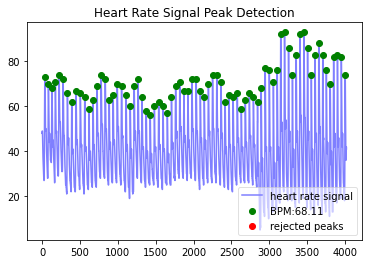

Average Beats Per Minute ::  68.11301715438951
Number of Peaks ::  76


In [4]:
# Display the Data with all essential parameters
working_data, measures = hp.process(data, frequency)
hp.plotter(working_data, measures)
print("Average Beats Per Minute :: ", measures['bpm'])
print("Number of Peaks :: ", len(working_data['peaklist']))